In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import math

from scipy.stats import norm
import math
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import ipywidgets as wdg
from matplotlib.cm import ScalarMappable


np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
df =  df.T
stats = df.describe(percentiles = [0.025, 0.25, 0.5, 0.75, 0.975])
stats

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
2.5%,-355681.148548,-153328.104574,-241403.480324,-89912.101523
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
97.5%,426438.692036,235109.658331,305636.167342,183234.950476
max,817505.608159,395586.505068,490091.665037,320826.888044


In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import math
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import ipywidgets as wdg
from matplotlib.cm import ScalarMappable

%matplotlib notebook

###Set up dummy data
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

###Calculate statistics incl confidence interval for the mean.  Calculate 97.5% interquantile range of the normal distribution (being 1.96 x standard error)
df =  df.T
stats = df.describe(percentiles = [0.025, 0.25, 0.5, 0.75, 0.975])
mean = stats.loc['mean']
onesd_meanerror = df.sem(axis = 0)
error_low = onesd_meanerror*1.96
error_high = onesd_meanerror*1.96

###Setup initial chart and plot bar chart
fig = plt.figure()
ax = fig.add_subplot(111)
x_axis_label = df.columns.values
plt.xticks(x_axis_label)

bars = (ax.bar(x_axis_label, mean, width=0.85, alpha=0.9, align='center',
                yerr = (error_low, error_high), error_kw={'capsize': 10, 'elinewidth': 2, 'alpha':1}))

###Create and display textarea widget
txt = wdg.Textarea(
    value='',
    placeholder='',
    description='Y Value:',
    disabled=False)
display(txt)

### Formats color bar.  Need the scalar mapable to enable use of the color bar.
my_cmap = plt.cm.get_cmap('coolwarm')
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Probability', rotation=270,labelpad=25)

ydataselect = 40000



    def color_bar(self, event):

        for index, bar in enumerate(bars):
            bar.set_color(c=my_cmap(self.calc_prob(index)))
            print(index)

    def calc_prob(self, index):
        global mean, onesd_meanerror
        mean2 = mean.iloc[index] # Changed
        err = onesd_meanerror.iloc[index]
        result = norm.cdf(Y_HORIZONTAL_LINE, loc= MEAN, scale= STANDARD_DEVIATION) # Changed
        return result

click = ClickChart(ax)

In [21]:
# 1) Calculate sample statistics
# 2) Calculate margin of error of this statistics
# 3) Select the horizontal line (a value)
# 4) Calculate the probability for this value to be within the range of the bars
# 5) Plot the bars
# 6) Plot the ranges
# 7) Plot the horizontal line
# 8) Plot colors according to likelihood of the range of having the y_value

In [4]:
import pandas as pd
import numpy as np
import math

from scipy.stats import norm
import math
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import ipywidgets as wdg
from matplotlib.cm import ScalarMappable


np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [5]:
# 1) and 2)

years = list(df.index)
means = []
st_deviations = []

for ind, row in df.iterrows():
    means.append(np.mean(row))
    st_deviations.append(np.std(row))
    
Margins_Error = []

z_scores = 1.96
n = 3650

for i, x in enumerate(means):
    margin_error = z_scores * (st_deviations[i] / math.sqrt(n))
    Margins_Error.append(margin_error)
    
print('means:', means)
print('standard deviations:', st_deviations)

means: [33312.10747554433, 41861.85954107339, 39493.3049413989, 47743.55096926713]
standard deviations: [200603.41598467366, 98384.87605310383, 140350.69516606425, 69771.62574782132]


In [56]:
# 3)

horizontal_line = 30000


# 4)
def calc_prob(point, mean, std):
    result = norm.cdf(point, loc = mean, scale = std)
    return result

probabilities = []

for i, x in enumerate(means):
    #prob = calc_prob(horizontal_line, x, st_deviations[i])
    prob = calc_prob(horizontal_line, x, st_deviations[i])
    probabilities.append(prob)
    #print(st_deviations[i])
    print('mean:', x, 'probability of value {} being within range of {}'.format(horizontal_line, i), prob)
probabilities

mean: 33312.10747554433 probability of value 30000 being within range of 0 0.4934134736866103
mean: 41861.85954107339 probability of value 30000 being within range of 1 0.4520174461970324
mean: 39493.3049413989 probability of value 30000 being within range of 2 0.4730361520519921
mean: 47743.55096926713 probability of value 30000 being within range of 3 0.39962843143014026


[0.4934134736866103,
 0.4520174461970324,
 0.4730361520519921,
 0.39962843143014026]

In [64]:
test_statistic = (means[0] - 40000 )/ (st_deviations[0] / math.sqrt(n))
norm.cdf(test_statistic, loc = 0, scale = 1)

0.02199553495658371

In [65]:
norm.cdf(40000, loc = means[0], scale = st_deviations[0])

0.5132978240189844

In [68]:
probabilities = []
for i in range(len(means)):
    # I calculate the test statistics
    t = (means[i] - 30000) / (st_deviations[i] / math.sqrt(n))
    # Now the probabilities
    prob = norm.cdf(t, loc = 0, scale = 1)
    probabilities.append(prob)
    
probabilities

[0.8407388539482797, 0.999999999999838, 0.9999781015660011, 1.0]

In [35]:
df2 =  df.T
stats = df2.describe(percentiles = [0.025, 0.25, 0.5, 0.75, 0.975])
mean = stats.loc['mean']
df2.sem(axis = 0)

1992    3320.866311
1993    1628.701180
1994    2323.419534
1995    1155.026400
dtype: float64

In [25]:
import pandas as pd
import numpy as np
import math

from scipy.stats import norm
import math
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import ipywidgets as wdg
from matplotlib.cm import ScalarMappable


np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [26]:
# 1) Calculate sample statistics
# 2) Calculate margin of error of this statistics
# 3) Select the horizontal line (a value)
# 4) Calculate the probability for this value to be within the range of the bars
# 5) Plot the bars
# 6) Plot the ranges
# 7) Plot the horizontal line
# 8) Plot colors according to likelihood of the range of having the y_value

In [56]:
# First I create the list to store the parameters I need for every year, such as: mean, standard error, etc...
years = list(df.index)
means = []
# SE = sigma / sqrt(n)
SEs = []

# Then I define the parameters that remain the same across different years
n = 3650
z_score = 1.96

# I loop through the dataframe index to calculate the sample statistics I need
for ind, row in df.iterrows():
    means.append(row.mean())
    # SE = sigma / sqrt(n)
    SEs.append(row.std() / math.sqrt(n))
    

# Margins of error for later plotting
MEs = [x * z_score for x in SEs]

In [71]:
# I define the function to calculate the probability for a given value to be above the sample statistic (interval)
def calc_prob(point, mean, std):
    result = norm.cdf(point, loc = mean, scale = std)
    return result

# I define the point (line) I want to check the probability for
horizontal_line = 50000

# Define the probabilities list, where I'll store all the probs for each year to be below the given value -> the
# variable I just defined
probabilities = []

# I loop through all the years to calculate the probs
for i in range(len(means)):
    prob = calc_prob(horizontal_line, means[i], SEs[i])
    probabilities.append(prob)

0
1
2
3


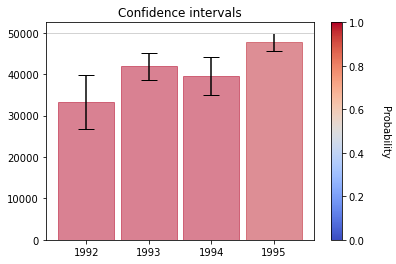

In [72]:
# I start the plot

fig = plt.figure()
ax = fig.add_subplot(111)

# I define the positions for the bars
pos = np.arange(len(years))
bars = plt.bar(pos, means, width = 0.9, align = 'center', alpha = 0.5,
               color = ['#56646B', 'blue', 'red', 'green'], edgecolor = 'black', yerr = MEs, capsize = 8)

# Now the ticks for the plot
plt.xticks(pos, years)

# Title
plt.title('Confidence intervals')

# I draw the horizontal line coming from the value we want the means to be compared with
plt.axhline(y = horizontal_line, linewidth = 1, color = 'lightgrey')

my_cmap = plt.cm.get_cmap('coolwarm')
sm = ScalarMappable(cmap = my_cmap, norm = plt.Normalize(0,1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Probability', rotation = 270,labelpad = 25)


for index, bar in enumerate(bars):
    bar.set_color(c = my_cmap(probabilities[index]))
    print(index)